# HW#2 Linear Regression

안녕하세요, 광운대학교 로봇학부의 오정현 교수입니다. 본 자료는 딥러닝 실습 수업을 위해 제작된 것입니다.

파이썬 문법
- 점프투파이썬(https://wikidocs.net/book/1) 참고

이번 과제는 Gradient descent를 이용하여 Linear regression을 구현해 보는 것입니다. 





## 1 - Package import

먼저 과제에 필요한 package를 import 합니다.
- [numpy](www.numpy.org)는 파이썬에서 행렬 연산을 위한 핵심 라이브러리입니다.
- [matplotlib](http://matplotlib.org) 파이썬에서 plot을 위한 라이브러리입니다.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

## 2. Data generation

Linear regression을 위한 데이터를 생성해봅시다.
이 데이터를 잘 표현하는 직선을 찾는 것이 linear regression의 목적입니다.

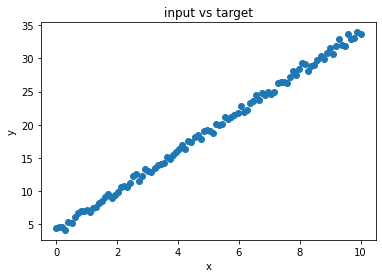

In [80]:
# 데이터 생성, x:input, y:target
# y=ax+b 형태, y=3x+4라고 하자

x = np.array([np.linspace(0, 10, 100)]) # 0부터 10까지 100개의 데이터를 생성합니다.
y = 3 * x + 4 + np.random.randn(*x.shape) * 0.5  # noise값을 변화하면서 다양한 데이터를 생성해 보세요.

plt.scatter(x, y)
plt.title('input vs target')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

데이터의 모양을 살펴볼까요? 

shape 함수를 쓰면 data의 shape를 알 수 있습니다.


example) data라는 변수의 shape: data.shape

**Exercise:** input data x와 output data y의 형태를 출력해보세요.

In [81]:
# Data의 사이즈를 출력해보세요.
### START CODE HERE ###
x_shape = x.shape
y_shape = y.shape
#numpy.shape으로 data shape확인
### END CODE HERE ###
print ("The shape of input data x: " + str(x_shape))
print ("The shape of target data y: " + str(y_shape))

The shape of input data x: (1, 100)
The shape of target data y: (1, 100)


**Expected Output**: 

The shape of input data x: (1, 100)

The shape of target data y: (1, 100)

## 3 - General Architecture of the learning algorithm ##

Linear regression을 구하기 위해서 우리의 hypothesis는 linear model을 가정합니다. 이 때 i-번째 input data $x^{(i)}$의 추정값 $\hat y^{(i)}$은 (1)과 같은 관계를 만족합니다. 


$$\hat y^{(i)} = w x^{(i)} + b \tag{1}$$

$\hat y$ 은 y-hat이라고 읽으며 $y$의 값을 추정한다는 의미로 흔히 쓰이는 표현입니다. 이 때 추정값 $\hat y^{(i)}$와 target값인 $y$ 사이에 loss function을 squared error 형태로 나타내면 (2)와 같습니다.

$$ \mathcal{L}(\hat y^{(i)}, y^{(i)}) =  \frac{1}{2}(\hat y^{(i)}-y^{(i)})^2 \tag{2}$$

마지막으로 전체 데이터 m개에 대한 cost function은 (3)과 같이 정의됩니다.

$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat y^{(i)}, y^{(i)})\tag{3}$$

최종적으로 이 cost function의 값을 최소화하는 $w$와 $b$를 찾는 것이 우리의 목표가 되는 것입니다.


## 4 - Gradient descent algorithm ## 
Gradient descent algorithm은 다음과 같은 단계로 구현합니다.

1. Parameter 초기화 `initialize_with_zeros()`
2. Loop (최적화 과정): `optimize()`
    - 현재 cost 계산(forward propagation) 및 현재 gradient를 계산 (backward propagation) : `propagate()`
    - Parameter 업데이트(gradient descent)

이 모든 과정을 합쳐서 `model()` 함수로 구현합니다.

### 4.1 - Parameter 초기화
**Exercise:** 아래 Parameter 초기화 함수를 구현하세요. $w$의 경우 0으로 이루어진 벡터이고 $b$의 경우 스칼라값 0으로 초기화하세요. np.zeros() 함수를 참고하세요.

In [0]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ###
    w = np.zeros([dim,1]) #numpy.zeros로 zero vector선언
    b = 0 #scalar
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [83]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


**Expected Output**: 


w = [[0.]\
     [0.]]

b = 0

### 4.2 - Forward and Backward propagation
**Exercise:** cost값 및 gradient를 계산하는 `propagate()` 함수를 구현하세요.

**Hints**:

Forward Propagation:
- X를 인수로 받는다.
- (1), (2), (3)을 합쳐서 전개하면 다음과 같은 cost function 식이 나온다.
$$J = \frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})^2\tag{4}$$

Backward Propagation:
- w와 b의 gradient를 계산한다.

$$ \frac{\partial J}{\partial w} = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)}+b-y^{(i)})\cdot x^{(i)}\tag{5}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (wx^{(i)}+b-y^{(i)})\tag{6}$$

이를 행렬 형태로 쓰면 다음과 같다.

$$J = \frac{1}{2m}np.sum[w^TX+b-Y]^.2\tag{4'}$$
\
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(w^TX+b-Y)^T\tag{5'}$$
\
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \ np.sum [w^TX+b-Y]\tag{6'}$$


In [0]:
# GRADED FUNCTION: propagate
from sklearn.metrics import mean_squared_error
def propagate(w, b, X, Y):
   
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ###
    cost = mean_squared_error((np.dot(w.T,X) + b),Y)/2
    """
    cost = np.sum((np.dot(w.T,X) + b - Y)**2) / (2*m) #MSE사용 (1/2는 상수여서 상관X)
    """
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ###
    dw = np.dot(X,(np.dot(w.T,X) + b - Y).T)/m
    db = np.sum(np.dot(w.T,X) + b - Y) / m
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [85]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[12.8       ]
 [30.82666667]]
db = 4.533333333333333
cost = 41.49333333333333


**Expected Output**:

dw = [[12.8       ]
 
 [30.82666667]]

db = 4.533333333333333

cost = 41.49333333333333

### 4.3 - Optimization
현재 parameter에 새로운 parameter를 업데이트하는 함수 `optimize()` 함수를 구현하세요.

**Exercise:** 우리의 parameter $w$와 $b$를 업데이트하는 식을 구현해야 합니다. paramter를 $\theta$라고 할 때, 업데이트 규칙은 $ \theta = \theta - \alpha \text{ } d\theta$로 정의됩니다. 이 때 $\alpha$를 learning rate라고 합니다.

In [0]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
   
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation
        ### START CODE HERE ### 
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        ### START CODE HERE ###
        w = w - learning_rate*dw
        b = b - learning_rate*db
        ### END CODE HERE ###
        
        # Record the costs
        costs.append(cost)
        
        # Print the cost every 100 training iterations
        if i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [87]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 41.493333
w = [[-0.04675219]
 [-0.12676061]]
b = 1.223758731602527
dw = [[ 0.12274692]
 [-0.09406359]]
db = 0.3683397115660049


**Expected Output**: 

w = [[-0.04675219]

 [-0.12676061]]

b = 1.223758731602527

dw = [[ 0.12274692]

 [-0.09406359]]
 
db = 0.36833971156600487

## 5 - Merge all functions into a model ##

**Exercise:** 최종적으로 앞서 구한 함수들을 이용하여 model 함수를 구현하세요.

In [0]:
# GRADED FUNCTION: model

def model(X, Y, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (dim, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (dim, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    
    # initialize parameters with zeros
    w, b = initialize_with_zeros(X.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, X, Y, num_iterations, learning_rate, print_cost )
    
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
     
    ### END CODE HERE ###
  
    d = {"costs": costs,
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [89]:
d = model(x, y, num_iterations = 1000, learning_rate = 0.02, print_cost = True)

Cost after iteration 0: 219.679900
Cost after iteration 100: 0.652527
Cost after iteration 200: 0.298894
Cost after iteration 300: 0.168183
Cost after iteration 400: 0.119869
Cost after iteration 500: 0.102011
Cost after iteration 600: 0.095410
Cost after iteration 700: 0.092970
Cost after iteration 800: 0.092068
Cost after iteration 900: 0.091735


**Expected Output**: 

Cost after iteration 0: 218.021738

Cost after iteration 100: 1.053341

Cost after iteration 200: 0.692178

Cost after iteration 300: 0.470978

Cost after iteration 400: 0.335501

Cost after iteration 500: 0.252526

Cost after iteration 600: 0.201707

Cost after iteration 700: 0.170582

Cost after iteration 800: 0.151519

Cost after iteration 900: 0.139843



## 6 - Visualization ##
Learning이 진행될수록 cost가 어떻게 나타나는지 확인해보세요.


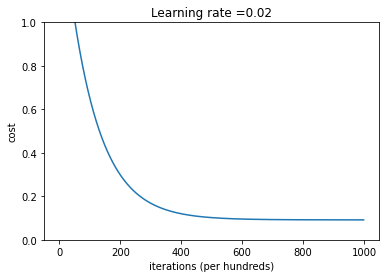

In [90]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.ylim((0,1))
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

w = [[3.01223771]]
b = 3.964959489146403


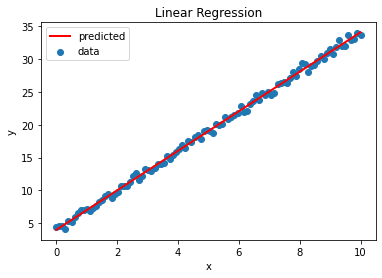

In [91]:
print ("w = " + str(d["w"]))
print ("b = " + str(d["b"]))

y_hat = np.dot(np.transpose(d["w"]),x)+d["b"]
plt.scatter(x, y,label='data')
plt.plot(np.transpose(x),np.transpose(y_hat), color='red', linewidth=2, label='predicted')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Gradient descent를 통해 추정한 직선을 plot하여 Linear regression이 잘 되는지 확인해보세요.

##(Optioanal) multi-dimensional Linear Regression
input data가 1차원일때 linear regression을 수행하면 데이터를 잘 표현하는 직선을 찾습니다. 만약 input data가 2차원이라면 평면을 찾게 됩니다. 추가 구현을 하고 싶은 학생들은 한번 구현해서 확인해 보세요.

Text(0.5, 0, 'y')

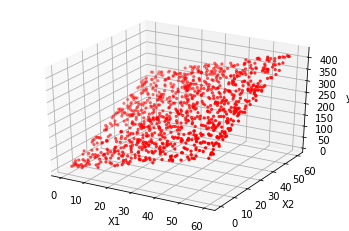

In [92]:
X = np.random.rand(2000).reshape(2,1000)*60
Y = np.array([X[0, :]*3+X[1, :]*4])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[0,:], X[1,:], Y, marker='.', color='red')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")

# **Change Learning rate & num_iterations**

learning_rate를 0.02에서 0.001로 줄여보았다

In [93]:
d_1 = model(x, y, num_iterations = 1000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 219.679900
Cost after iteration 100: 1.740506
Cost after iteration 200: 1.465998
Cost after iteration 300: 1.399245
Cost after iteration 400: 1.335908
Cost after iteration 500: 1.275639
Cost after iteration 600: 1.218288
Cost after iteration 700: 1.163716
Cost after iteration 800: 1.111786
Cost after iteration 900: 1.062372


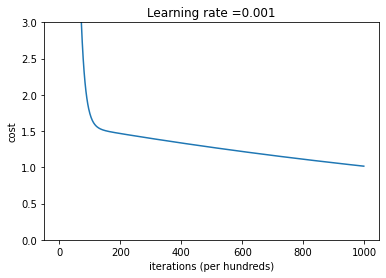

In [94]:
# Plot learning curve (with costs)
costs_1 = np.squeeze(d_1['costs'])
plt.plot(costs_1)
plt.ylabel('cost')
plt.ylim((0,3))
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_1["learning_rate"]))
plt.show()

learning rate를 줄였더니, 기존의 iteration = 1000 내에서는 끝까지 수렴되지 않았다.
iteration을 10000으로 늘려 확인해보자

Cost after iteration 0: 219.679900
Cost after iteration 100: 1.740506
Cost after iteration 200: 1.465998
Cost after iteration 300: 1.399245
Cost after iteration 400: 1.335908
Cost after iteration 500: 1.275639
Cost after iteration 600: 1.218288
Cost after iteration 700: 1.163716
Cost after iteration 800: 1.111786
Cost after iteration 900: 1.062372
Cost after iteration 1000: 1.015351
Cost after iteration 1100: 0.970607
Cost after iteration 1200: 0.928030
Cost after iteration 1300: 0.887516
Cost after iteration 1400: 0.848964
Cost after iteration 1500: 0.812279
Cost after iteration 1600: 0.777371
Cost after iteration 1700: 0.744154
Cost after iteration 1800: 0.712545
Cost after iteration 1900: 0.682467
Cost after iteration 2000: 0.653846
Cost after iteration 2100: 0.626612
Cost after iteration 2200: 0.600696
Cost after iteration 2300: 0.576036
Cost after iteration 2400: 0.552570
Cost after iteration 2500: 0.530240
Cost after iteration 2600: 0.508993
Cost after iteration 2700: 0.488774
Co

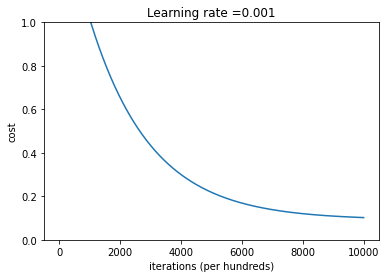

In [95]:
d_2 = model(x, y, num_iterations = 10000, learning_rate = 0.001, print_cost = True)
# Plot learning curve (with costs)
costs_2 = np.squeeze(d_2['costs'])
plt.plot(costs_2)
plt.ylabel('cost')
plt.ylim((0,1))
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d_2["learning_rate"]))
plt.show()

약 6000정도에서 elbow point가 나타나는 것을 알 수 있다.

w = [[3.05209532]]
b = 3.6998785938721888


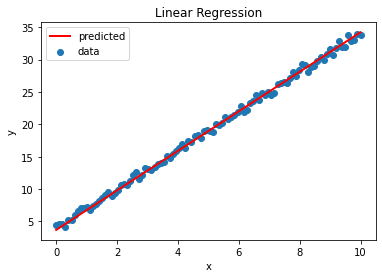

In [96]:
print ("w = " + str(d_2["w"]))
print ("b = " + str(d_2["b"]))

y_hat_2 = np.dot(np.transpose(d_2["w"]),x)+d_2["b"]
plt.scatter(x, y,label='data')
plt.plot(np.transpose(x),np.transpose(y_hat_2), color='red', linewidth=2, label='predicted')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

d = model(x, y, num_iterations = 1000, learning_rate = 0.02, print_cost = True)

w = [[3.01223771]]b = 3.964959489146403


d_2 = model(x, y, num_iterations = 10000, learning_rate = 0.001, print_cost = True)

w = [[3.05209532]]
b = 3.6998785938721888

# **New Data Set**


sklearn에서 제공하는 data로 Linear Regression수행

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# 데이터 로드
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = pd.DataFrame(diabetes.data)
Y = pd.Series(diabetes.target)
data = pd.concat([X,Y], axis = 1)
data.columns = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

In [31]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [32]:
# 결측치가 있나보자.
data.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [33]:
# 각 data의 타입
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


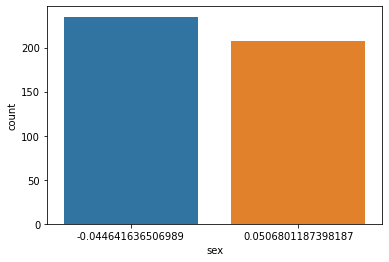

In [34]:
sns.countplot(data.sex)

In [0]:
def encoding (x):
    if x >= 0:
        return 1
    else:
        return 0

In [0]:
data.sex = data.sex.apply(encoding)

In [0]:
X = data.drop('target', axis=1)
Y = data.target

In [38]:
X.shape, Y.shape

((442, 10), (442,))

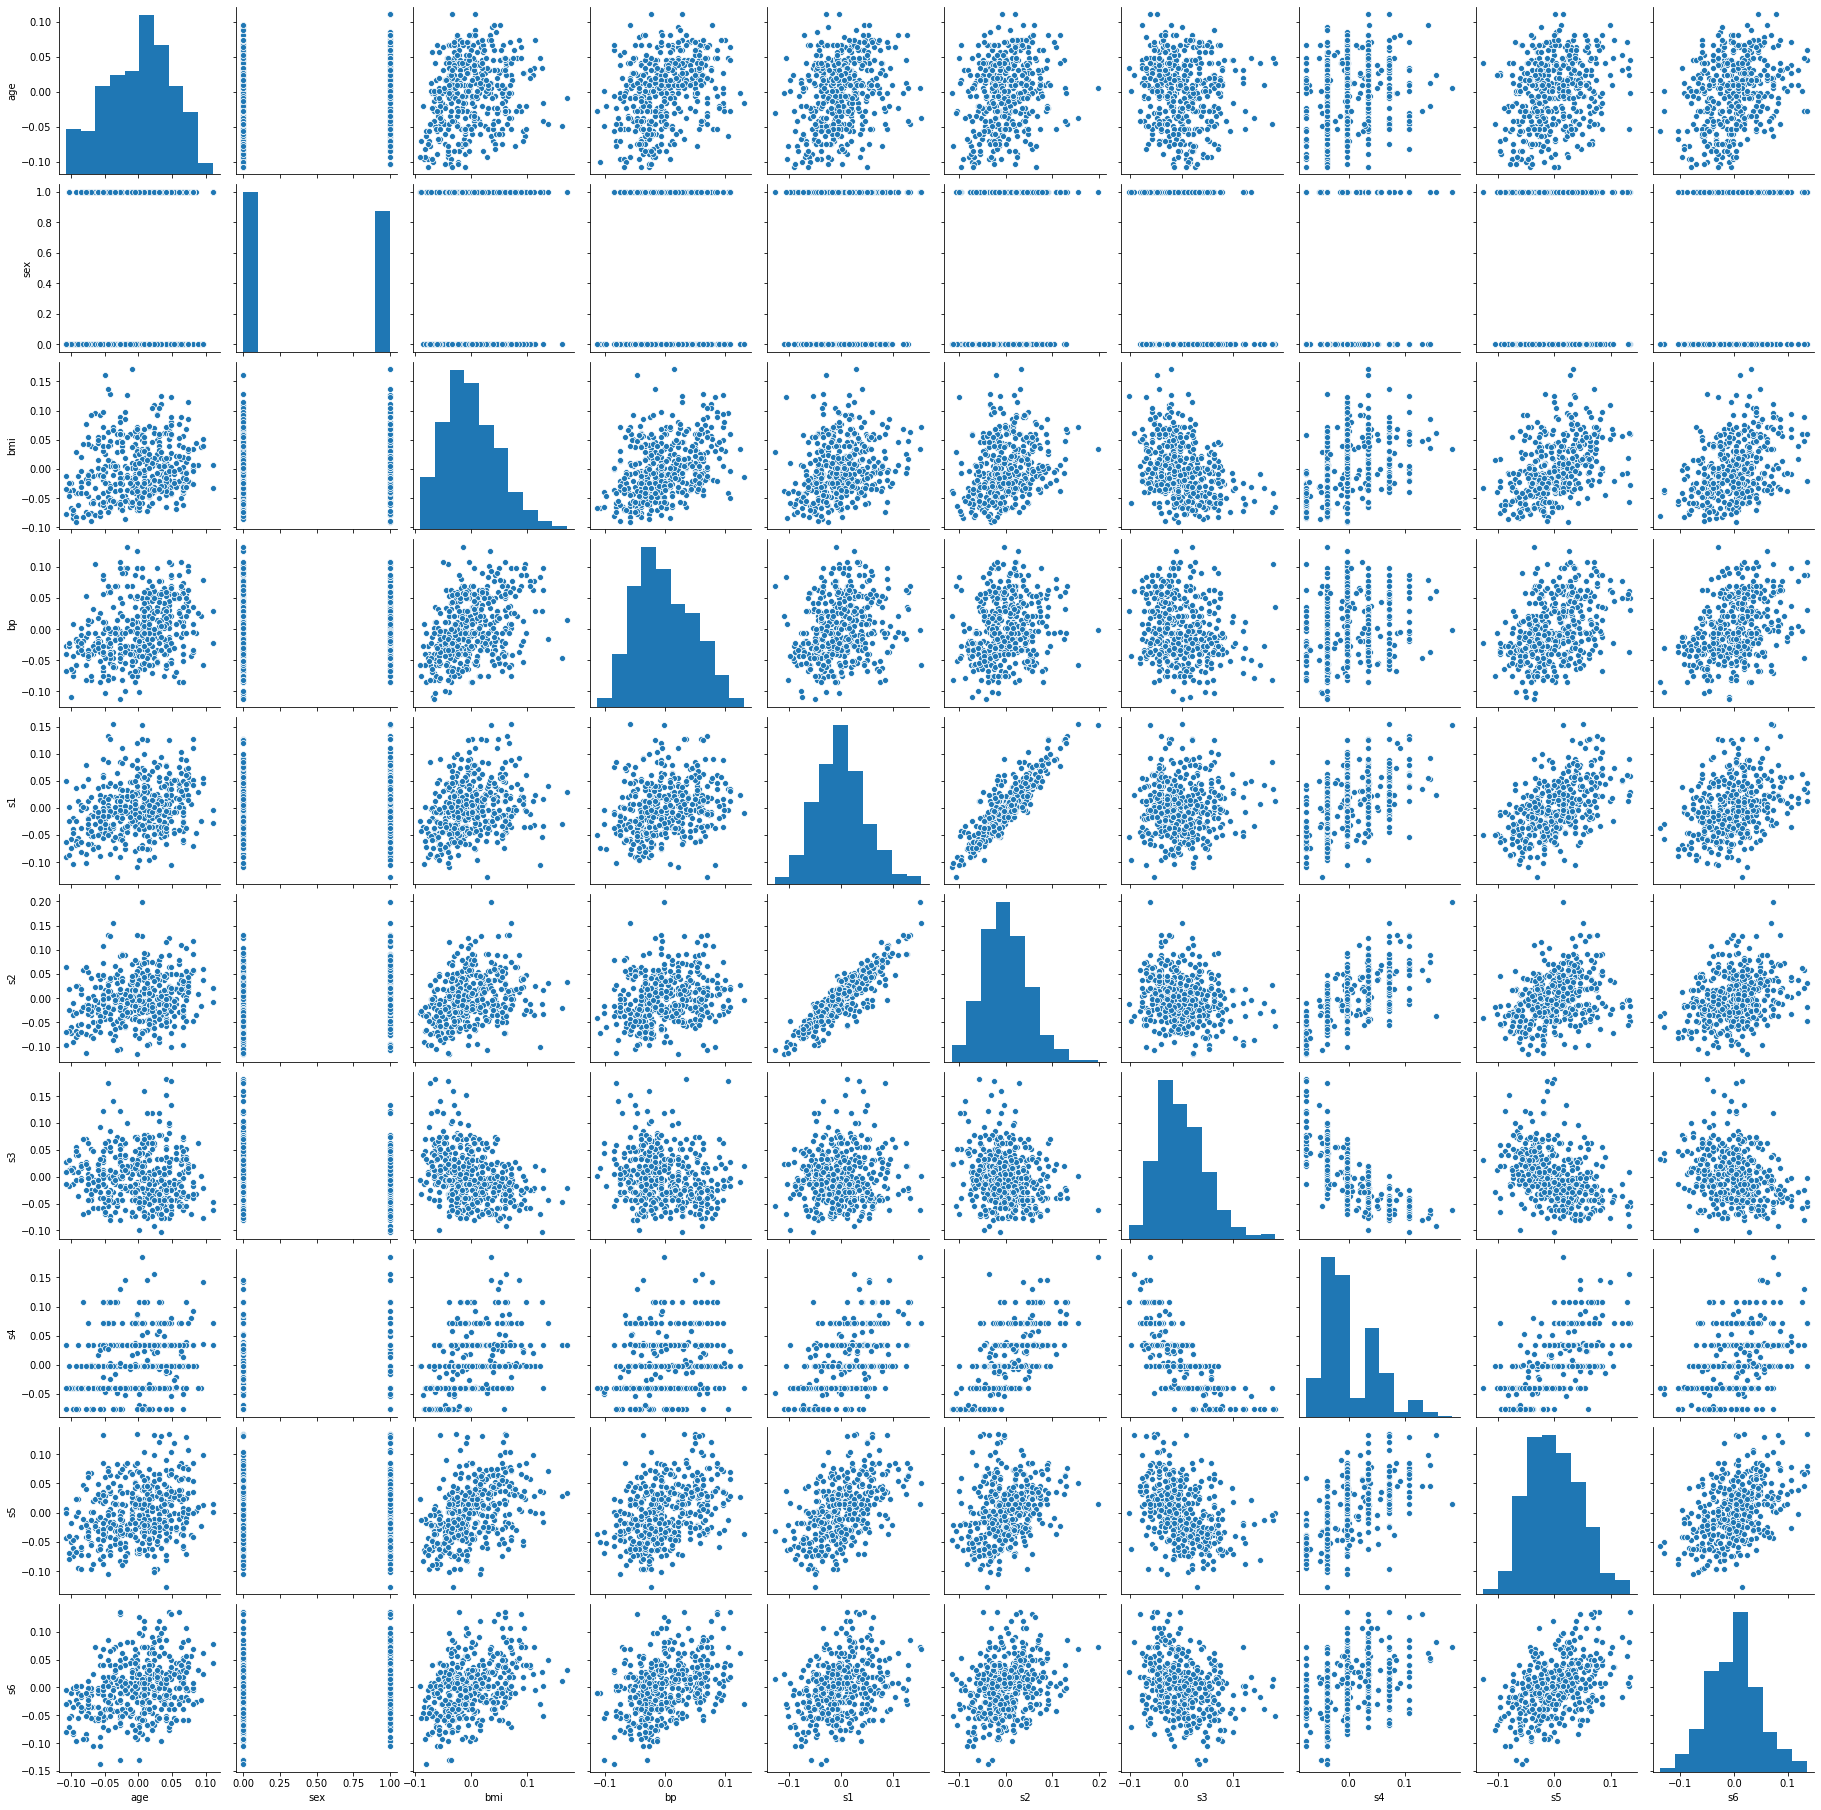

In [39]:
sns.pairplot(X)

In [40]:
#VIF확인하기
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])


,VIF Factor,features
4,59.129633,s1
5,39.157237,s2
6,15.384939,s3
8,10.075917,s5
7,8.860635,s4
2,1.493146,bmi
9,1.480504,s6
3,1.431969,bp
0,1.210990,age
1,1.130809,sex


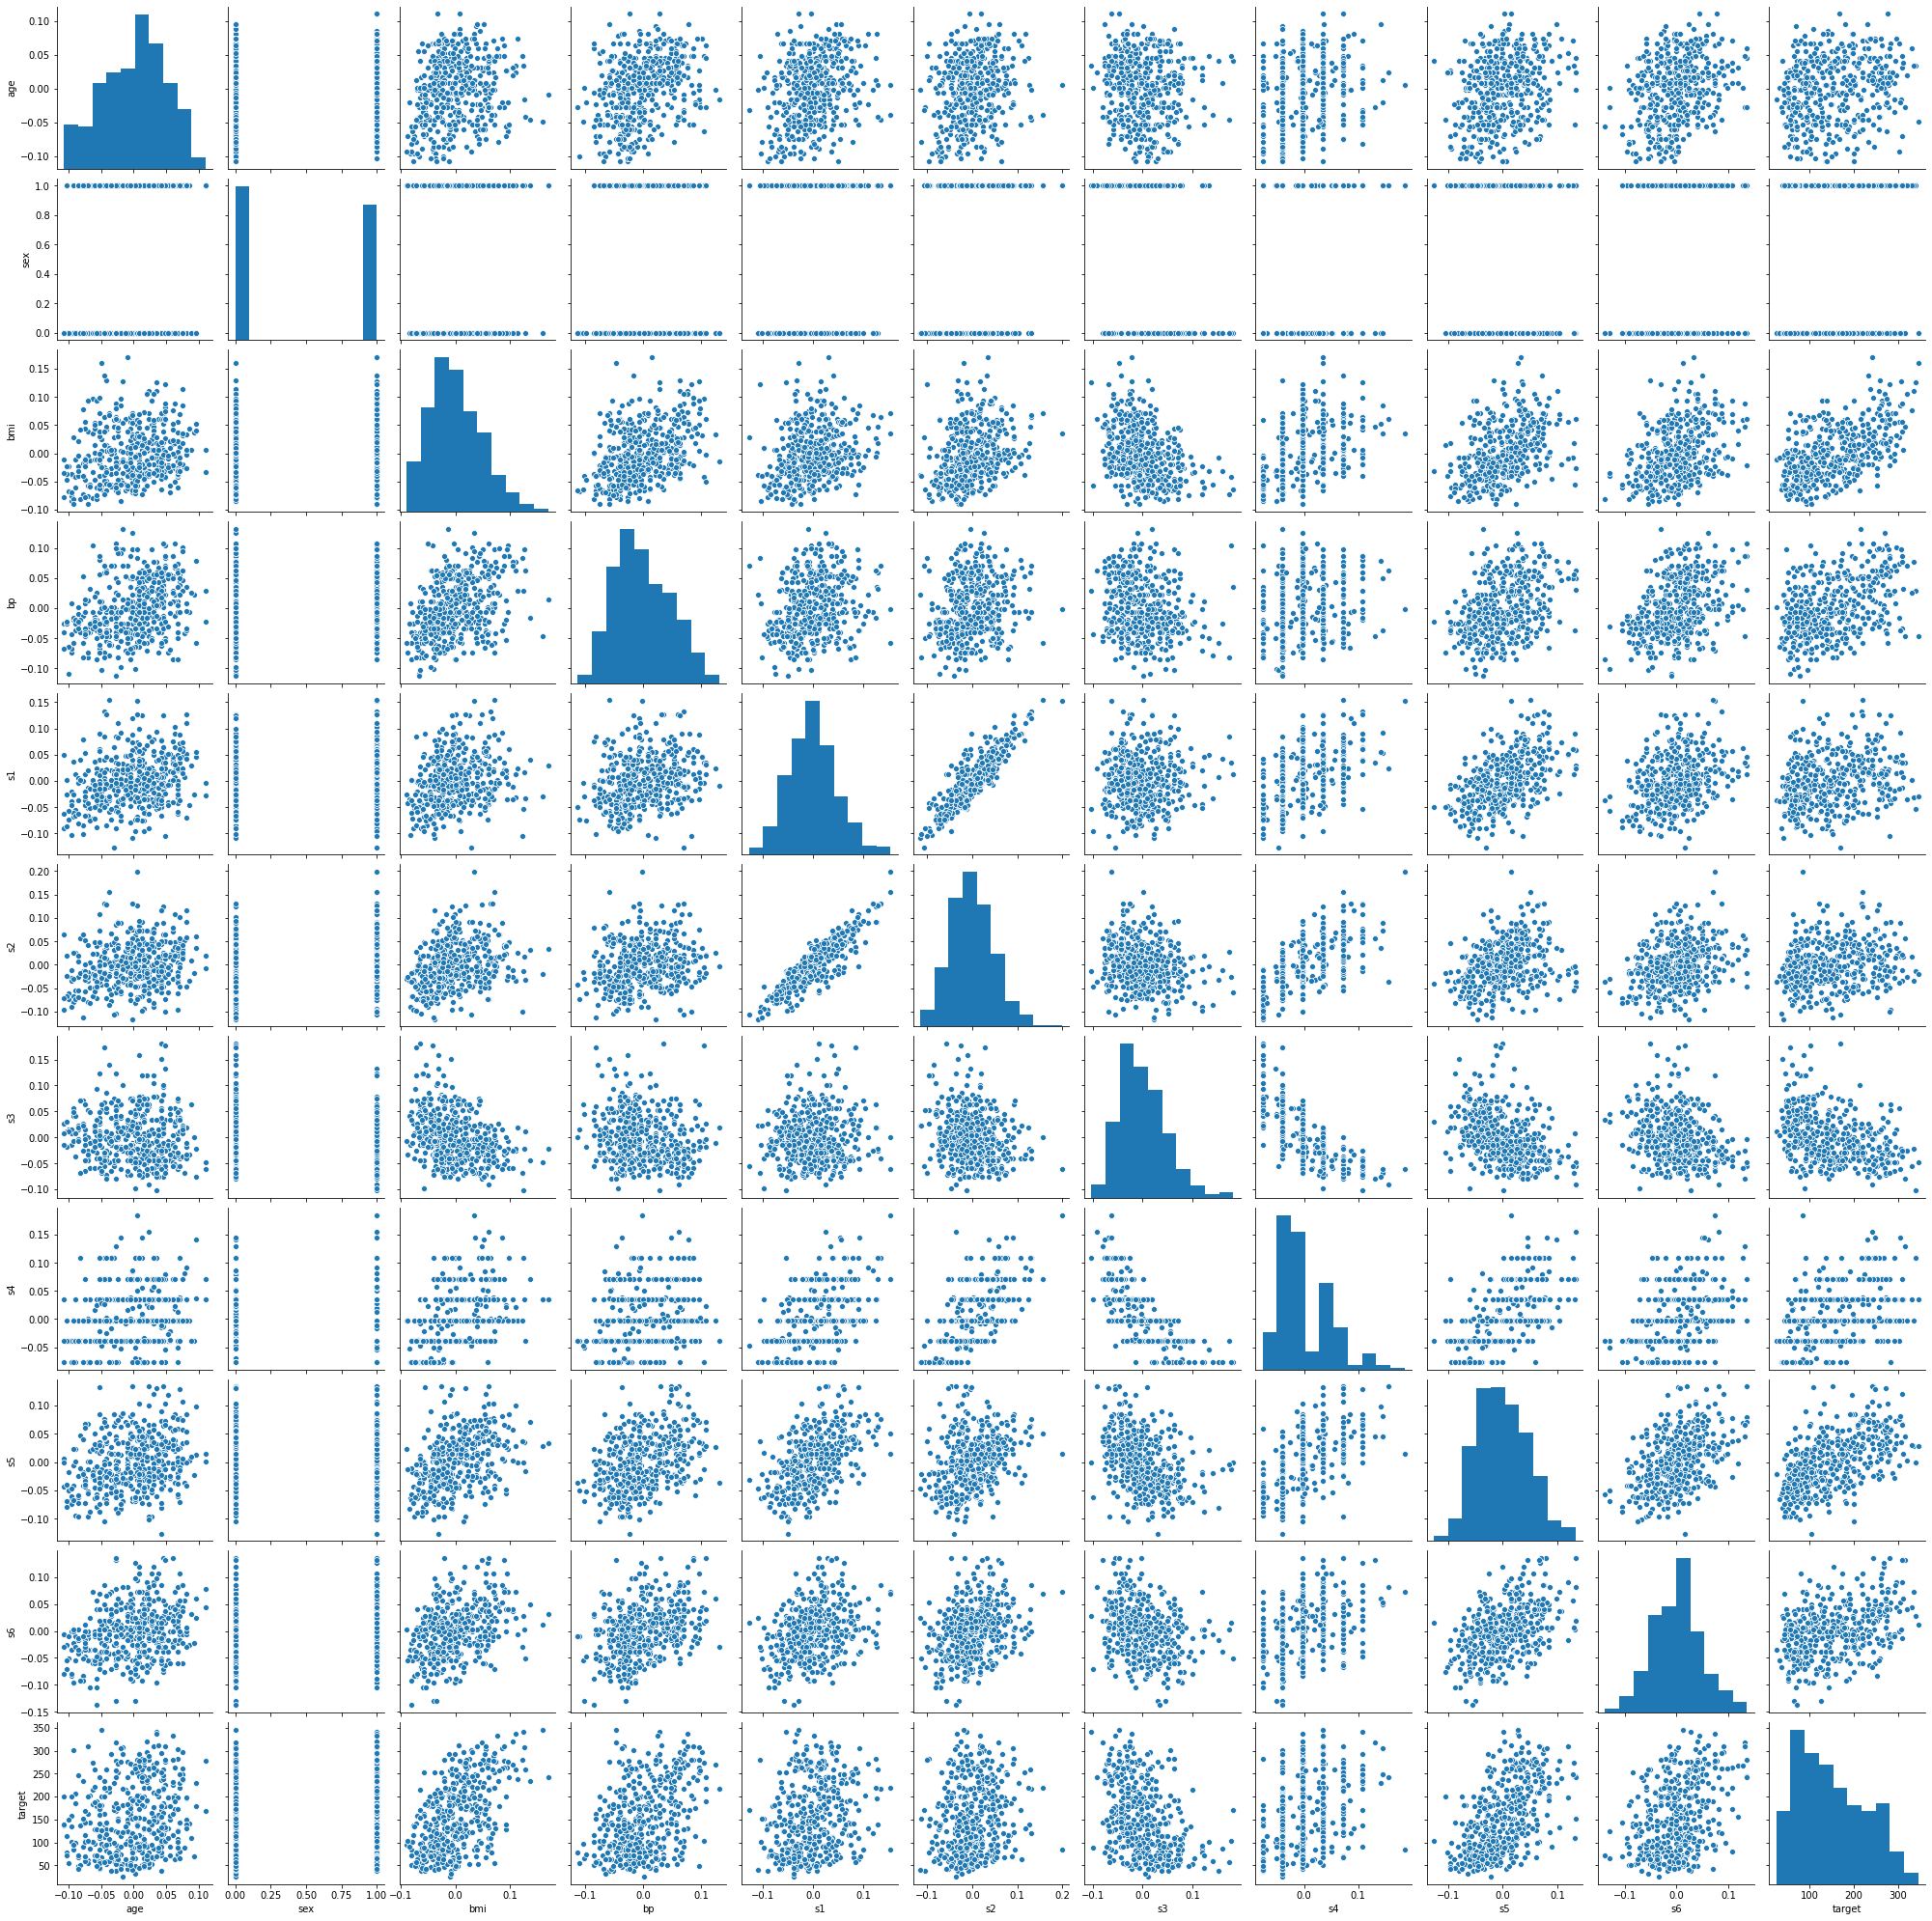

In [41]:
sns.pairplot(data)

In [0]:
# train, test data 분할
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
from sklearn.linear_model import LinearRegression

#모델 불러옴
model_LinearRegression = LinearRegression()
#train data에 fit시킴
model_LinearRegression.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
#fit된 모델의 R-square
model_LinearRegression.score(X_train, Y_train)

0.5539285357415584

In [45]:
#MSE
sklearn.metrics.mean_squared_error(Y_train, model_LinearRegression.predict(X_train))

2734.729272403143

In [46]:
#test데이터 예측
model_LinearRegression.predict(X_test)

array([238.47145247, 248.93170646, 164.05404165, 120.30794355,
       187.42422054, 259.04865002, 113.55556372, 188.07597044,
       149.49663441, 236.01099949, 172.24629506, 178.88073764,
       109.15751983,  92.13508975, 243.33042043,  87.356971  ,
       155.72606406,  66.99073989, 100.42610442, 218.09422877,
       196.66287912, 161.29832968, 161.70779605, 156.52520454,
       197.88796516, 167.57984206, 120.74478913,  84.83879727,
       192.03728687, 160.60687024, 175.17178362,  84.22833237,
       145.7995542 , 145.97333493, 140.96488953, 197.00421108,
       165.94322494, 190.65906468, 128.22520508, 206.41941223,
        84.35851196, 164.0256504 , 144.1056776 , 184.68355549,
       177.80238966,  74.32855231, 143.3660286 , 138.67726085,
       120.81146113, 234.34252077, 161.94390244,  74.5455476 ,
       154.71905074, 156.78884927, 237.42227096, 174.23053048,
       190.88212635, 118.98373473, 132.20418974, 168.52674824,
       214.74245466, 171.42364091, 157.37409906, 108.86

In [47]:
print(model_LinearRegression.coef_) #추정된 회귀계수(intercept제외)
print(model_LinearRegression.intercept_) #intercept

[ -35.55683674  -23.17931749  562.75404632  305.47203008 -662.78772128
  324.27527477   24.78193291  170.33056502  731.67810787   43.02846824]
163.3936057385858


In [48]:
#test데이터 R-square
model_LinearRegression.score(X_test, Y_test)

0.3322220326906513

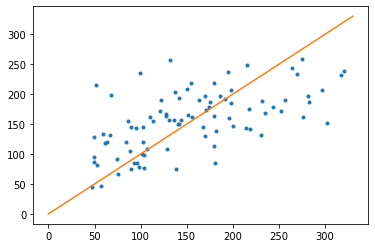

In [50]:
# 예측 vs. 실제데이터 plot
Y_pred = model_LinearRegression.predict(X_test) 
plt.plot(Y_test, Y_pred, '.')

# 예측과 실제가 비슷하면, 라인상에 분포함
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()